In [2]:
"""
Test reading in data & doing basic classification stuff. Either clean this file up later, or
do other work on another file
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import os
print(os.listdir("../CS230_Project"))

['380000-lyrics-from-metrolyrics.zip', 'test_classification_1.ipynb', '.DS_Store', 'preprocess_data.ipynb', 'dataset_clean.csv', 'lyrics.csv', '.ipynb_checkpoints', 'billboard-lyrics.zip', 'billboard_lyrics_1964-2015.csv']


In [3]:
import pandas as pd

df = pd.read_csv('dataset_clean.csv')

In [4]:
lyrics = df['Lyrics'].values
years = df['Year'].values

In [29]:
lyrics_train, lyrics_test, y_train, y_test = train_test_split(lyrics, years, test_size = 0.3, random_state = 1000)



In [25]:
vectorizer = CountVectorizer()
vectorizer.fit(lyrics_train)

X_train = vectorizer.transform(lyrics_train)
X_test = vectorizer.transform(lyrics_test)

In [26]:
# number of classes is 6 if grouping by decade, 11 if grouping by 5 years
n_classes = 6

years_train = tf.keras.utils.to_categorical(y_train,num_classes=n_classes)
years_test = tf.keras.utils.to_categorical(y_test,num_classes=n_classes)

In [27]:
X_train

<3397x33731 sparse matrix of type '<class 'numpy.int64'>'
	with 378699 stored elements in Compressed Sparse Row format>

In [28]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(n_classes,activation='softmax'))

In [88]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                337320    
_________________________________________________________________
dense_77 (Dense)             (None, 6)                 66        
Total params: 337,386
Trainable params: 337,386
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model.fit(X_train, years_train, 
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, years_test),
                    batch_size=10)

Train on 3397 samples, validate on 1456 samples
Epoch 1/100
3397/3397 [==============================] - 8s 2ms/step - loss: 1.6166 - acc: 0.3091 - val_loss: 1.5154 - val_acc: 0.3654
Epoch 2/100
3397/3397 [==============================] - 5s 1ms/step - loss: 1.0771 - acc: 0.6173 - val_loss: 1.5234 - val_acc: 0.4004
Epoch 3/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.6700 - acc: 0.8113 - val_loss: 1.5632 - val_acc: 0.4093
Epoch 4/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.3912 - acc: 0.9123 - val_loss: 1.7119 - val_acc: 0.4128
Epoch 5/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.2370 - acc: 0.9547 - val_loss: 1.8564 - val_acc: 0.4011
Epoch 6/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.1531 - acc: 0.9741 - val_loss: 1.9783 - val_acc: 0.4155
Epoch 7/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.1099 - acc: 0.9826 - val_loss: 2.1278 - val_acc: 0.4073
Epoch 8

Epoch 61/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.0278 - acc: 0.9906 - val_loss: 4.4458 - val_acc: 0.3805
Epoch 62/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.0303 - acc: 0.9903 - val_loss: 4.3512 - val_acc: 0.3826
Epoch 63/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.0232 - acc: 0.9897 - val_loss: 4.7495 - val_acc: 0.3826
Epoch 64/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.0224 - acc: 0.9909 - val_loss: 4.6377 - val_acc: 0.3860
Epoch 65/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.0208 - acc: 0.9909 - val_loss: 4.7527 - val_acc: 0.3743
Epoch 66/100
3397/3397 [==============================] - 5s 1ms/step - loss: 0.0203 - acc: 0.9921 - val_loss: 4.7002 - val_acc: 0.3846
Epoch 67/100
3397/3397 [==============================] - 4s 1ms/step - loss: 0.0218 - acc: 0.9909 - val_loss: 4.8555 - val_acc: 0.3846
Epoch 68/100
3397/3397 [========================

In [90]:
loss, accuracy = model.evaluate(X_train, years_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) # Prev 0.9941
loss, accuracy = model.evaluate(X_test, years_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) # prev 0.3777

Training Accuracy: 0.9926
Testing Accuracy:  0.3716


In [91]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

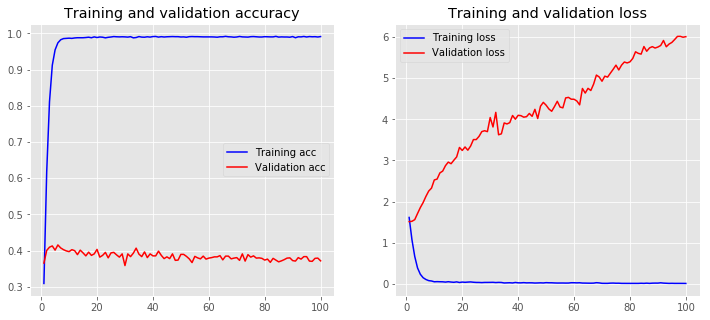

In [92]:
plot_history(history)


In [93]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(lyrics_train) 

X_train = tokenizer.texts_to_sequences(lyrics_train)
X_test = tokenizer.texts_to_sequences(lyrics_test)

vocab_size = len(tokenizer.word_index) + 1

In [94]:
maxlen = 1500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [95]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 1500, 50)          1689000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 75000)             0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                750010    
_________________________________________________________________
dense_79 (Dense)             (None, 6)                 66        
Total params: 2,439,076
Trainable params: 2,439,076
Non-trainable params: 0
_________________________________________________________________


/Users/Joe1/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/Joe1/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3397 samples, validate on 1456 samples
Epoch 1/20
3397/3397 [==============================] - 29s 8ms/step - loss: 1.7930 - acc: 0.1934 - val_loss: 1.7734 - val_acc: 0.1985
Epoch 2/20
3397/3397 [==============================] - 25s 7ms/step - loss: 1.7558 - acc: 0.2025 - val_loss: 1.6707 - val_acc: 0.2782
Epoch 3/20
3397/3397 [==============================] - 27s 8ms/step - loss: 1.6176 - acc: 0.3011 - val_loss: 1.6148 - val_acc: 0.3159
Epoch 4/20
3397/3397 [==============================] - 27s 8ms/step - loss: 1.2862 - acc: 0.5046 - val_loss: 1.6180 - val_acc: 0.3434
Epoch 5/20
3397/3397 [==============================] - 25s 7ms/step - loss: 0.9840 - acc: 0.6568 - val_loss: 1.6411 - val_acc: 0.3578
Epoch 6/20
3397/3397 [==============================] - 24s 7ms/step - loss: 0.7573 - acc: 0.7460 - val_loss: 1.7933 - val_acc: 0.3434
Epoch 7/20
3397/3397 [==============================] - 27s 8ms/step - loss: 0.6206 - acc: 0.7931 - val_loss: 1.8646 - val_acc: 0.3523
Epoch 8

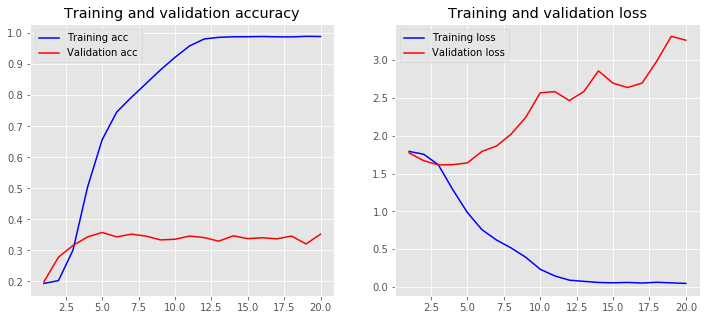

In [96]:
history = model.fit(X_train, years_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, years_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, years_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, years_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [97]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(n_classes, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 1500, 100)         3378000   
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 1496, 128)         64128     
_________________________________________________________________
global_max_pooling1d_35 (Glo (None, 128)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_81 (Dense)             (None, 6)                 66        
Total params: 3,443,484
Trainable params: 3,443,484
Non-trainable params: 0
_________________________________________________________________


/Users/Joe1/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/Joe1/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3397 samples, validate on 1456 samples
Epoch 1/10
3397/3397 [==============================] - 117s 35ms/step - loss: 1.7464 - acc: 0.2223 - val_loss: 1.7144 - val_acc: 0.2390
Epoch 2/10
3397/3397 [==============================] - 108s 32ms/step - loss: 1.5935 - acc: 0.3444 - val_loss: 1.6434 - val_acc: 0.3111
Epoch 3/10
3397/3397 [==============================] - 109s 32ms/step - loss: 1.2851 - acc: 0.4946 - val_loss: 1.5221 - val_acc: 0.3784
Epoch 4/10
3397/3397 [==============================] - 104s 31ms/step - loss: 0.8625 - acc: 0.7012 - val_loss: 1.5322 - val_acc: 0.3935
Epoch 5/10
3397/3397 [==============================] - 108s 32ms/step - loss: 0.5329 - acc: 0.8434 - val_loss: 1.7024 - val_acc: 0.3977
Epoch 6/10
3397/3397 [==============================] - 103s 30ms/step - loss: 0.3611 - acc: 0.8855 - val_loss: 1.9744 - val_acc: 0.4087
Epoch 7/10
3397/3397 [==============================] - 112s 33ms/step - loss: 0.2704 - acc: 0.9037 - val_loss: 2.1858 - val_acc: 

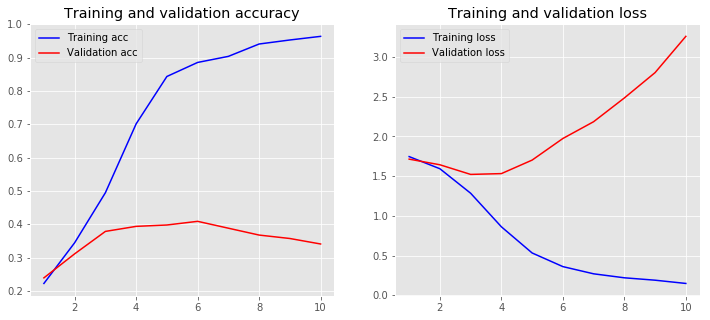

In [98]:
history = model.fit(X_train, years_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, years_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, years_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, years_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [41]:
# Try example from this site: https://medium.com/@manoveg/multi-class-text-classification-with-probability-prediction-for-each-class-using-linearsvc-in-289189fbb100

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

text = lyrics
labels = years

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.3)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)
 
labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

print(labels.classes_)

[0 1 2 3 4 5]


In [17]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

linear_svc = LinearSVC(penalty='l1',dual=False)
clf = linear_svc.fit(X_train_transformed,y_train_lables_trf)

calibrated_svc = CalibratedClassifierCV(base_estimator=linear_svc, cv="prefit")

calibrated_svc.fit(X_train_transformed, y_train_lables_trf)
predicted = calibrated_svc.predict(X_test_transformed)

print('Average accuracy on test set = {}'.format(np.mean(predicted == labels.transform(y_test))))


Average accuracy on test set = 0.36538461538461536


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(lyrics).toarray()
labels = years
features.shape



(4853, 15658)

In [21]:
model = LinearSVC(penalty='l1',dual=False)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 24,  49,  26,  19,   6,   1],
       [ 27, 128,  61,  38,  12,   9],
       [ 17,  48, 125,  57,  26,  13],
       [  6,  42,  80, 107,  59,  10],
       [  1,  33,  39,  43, 145,  31],
       [  3,  23,  13,  15,  51,  69]])

In [23]:
conf_mat

array([[ 24,  49,  26,  19,   6,   1],
       [ 27, 128,  61,  38,  12,   9],
       [ 17,  48, 125,  57,  26,  13],
       [  6,  42,  80, 107,  59,  10],
       [  1,  33,  39,  43, 145,  31],
       [  3,  23,  13,  15,  51,  69]])

In [ ]:
# play around w/ modifying baseline model 

In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(lyrics_train)

X_train = vectorizer.transform(lyrics_train)
X_test = vectorizer.transform(lyrics_test)

In [31]:
# number of classes is 6 if grouping by decade, 11 if grouping by 5 years
n_classes = 6

years_train = tf.keras.utils.to_categorical(y_train,num_classes=n_classes)
years_test = tf.keras.utils.to_categorical(y_test,num_classes=n_classes)

In [32]:
X_train

<3397x33731 sparse matrix of type '<class 'numpy.int64'>'
	with 378699 stored elements in Compressed Sparse Row format>

In [69]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(lyrics_train) 

X_train = tokenizer.texts_to_sequences(lyrics_train)
X_test = tokenizer.texts_to_sequences(lyrics_test)

vocab_size = len(tokenizer.word_index) + 1

In [70]:
maxlen = 1500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [102]:
input_dim = X_train.shape[1]

from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Dropout

model = Sequential()
model.add(Bidirectional(LSTM(10)))
# model.add(Dropout(0.5))
# model.add(layers.Dense(10, input_dim=input_dim, 
#                        bias_regularizer=regularizers.l1(0.01),
#                        kernel_regularizer=regularizers.l2(0.01),
#                        activation='relu'))
# model.add(Dropout(0.5))

model.add(layers.Dense(n_classes,activation='softmax'))


# TRY THIS: https://www.kaggle.com/abhisheksinha28/bidirectional-lstm/data

In [103]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [104]:
history = model.fit(X_train, years_train, 
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, years_test),
                    batch_size=10) 

Train on 3397 samples, validate on 1456 samples
Epoch 1/100
3397/3397 [==============================] - 3s 919us/step - loss: 3.6114 - acc: 0.1752 - val_loss: 14.1474 - val_acc: 0.1202
Epoch 2/100
3397/3397 [==============================] - 1s 359us/step - loss: 3.1251 - acc: 0.1852 - val_loss: 14.1299 - val_acc: 0.1223
Epoch 3/100
3397/3397 [==============================] - 1s 357us/step - loss: 3.0523 - acc: 0.1969 - val_loss: 14.0927 - val_acc: 0.1202
Epoch 4/100
3397/3397 [==============================] - 1s 356us/step - loss: 3.0282 - acc: 0.1805 - val_loss: 13.4481 - val_acc: 0.1202
Epoch 5/100
3397/3397 [==============================] - 1s 360us/step - loss: 3.0427 - acc: 0.1911 - val_loss: 9.9505 - val_acc: 0.1195
Epoch 6/100
3397/3397 [==============================] - 1s 365us/step - loss: 2.9474 - acc: 0.1987 - val_loss: 5.1039 - val_acc: 0.1188
Epoch 7/100
3397/3397 [==============================] - 1s 365us/step - loss: 2.0739 - acc: 0.1987 - val_loss: 1.9654 - val_a

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(X_train, years_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy)) # Prev 0.9941
loss, accuracy = model.evaluate(X_test, years_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) # prev 0.3777

In [ ]:
years_pred = model.predict(X_test)

conf_mat = confusion_matrix(years_test, years_pred)
conf_mat